"""Make sure there's a `data` folder at the same level as the `src` folder before running this script. It should contain all the necessary dataset files for the code to work correctly."""


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Get the directory of the current script
script_dir = os.getcwd()

# Construct the file path dynamically for input dataset
data_folder = os.path.join(script_dir, "..", "data")
file_path = os.path.join(data_folder, "processed_data.csv")

df = pd.read_csv(file_path, encoding="ISO-8859-1", delimiter=",", on_bad_lines="skip", low_memory=False)

# Normalizing factors
min_year = 1753
max_year = 2104

# Reverse normalize year_of_construction to actual years
df['actual_year_of_construction'] = min_year + (df['year_of_construction'] * (max_year - min_year))

In [6]:
df_selected = df[['totalprimaryenergyfact', 'firstenerprodconvfactor', 'firstenerproddelivered', 
                  'secondenerproddelivered', 'thirdenerproddelivered']].copy()

# Energy savings cost
df_selected['energy_savings'] = df_selected[['firstenerproddelivered', 'secondenerproddelivered', 'thirdenerproddelivered']].sum(axis=1)
df_selected['cost_per_unit'] = df_selected['firstenerprodconvfactor']

# Cost savings per investment dollar
df_selected['investment'] = df_selected['cost_per_unit']
df_selected['cost_savings_per_dollar'] = df_selected['energy_savings'] / df_selected['investment']

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\606253619.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='totalco2emissions', y='countyname', data=county_emissions, palette='plasma')


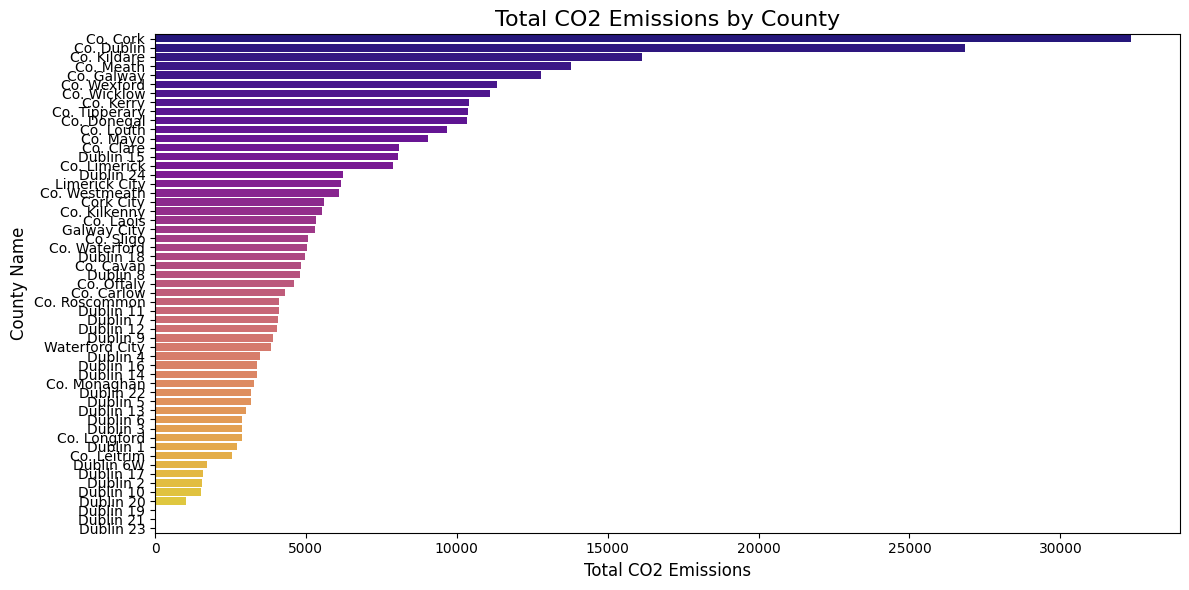

In [15]:
# ### --- ✅ Visualization 1: Which Counties Have the Worst CO₂ Emissions? 📍 --- ###
# Group data by county and sum the total CO2 emissions
county_emissions = df.groupby('countyname')['totalco2emissions'].sum().reset_index()

# Sort by total CO2 emissions in descending order
county_emissions = county_emissions.sort_values(by='totalco2emissions', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='totalco2emissions', y='countyname', data=county_emissions, palette='plasma')
plt.title('Total CO2 Emissions by County', fontsize=16)
plt.xlabel('Total CO2 Emissions', fontsize=12)
plt.ylabel('County Name', fontsize=12)
plt.tight_layout()
plt.savefig('county_co2_emissions.png', dpi=300)
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3294585552.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_berrating, x='berrating', y='countyname', palette='plasma')
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3294585552.py:13: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3294585552.py:14: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.savefig("regions_best_energy_ratings.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


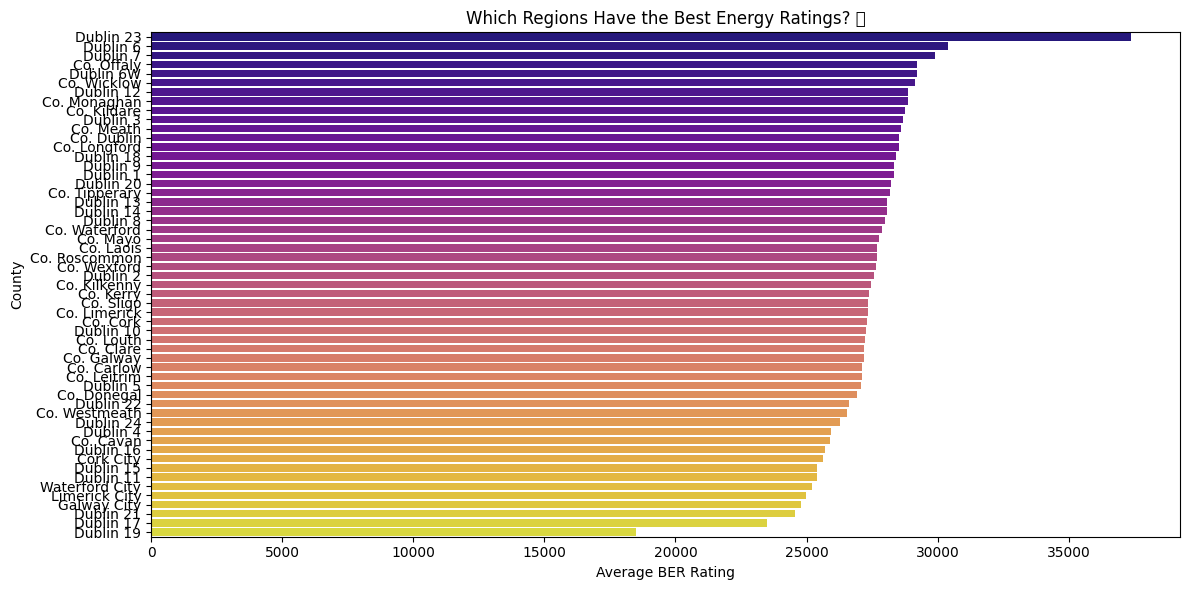

In [16]:
# --- ✅ Visualization 2: Which Regions Have the Best Energy Ratings? 🏙️ --- ###

# Plotting average BER rating by county
county_berrating = df.groupby('countyname')['berrating'].mean().reset_index()
county_berrating = county_berrating.sort_values(by='berrating', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=county_berrating, x='berrating', y='countyname', palette='plasma')
plt.title('Which Regions Have the Best Energy Ratings? 🏙️')
plt.xlabel('Average BER Rating')
plt.ylabel('County')
plt.tight_layout()
plt.savefig("regions_best_energy_ratings.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3215569080.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_heating_energy, x='primaryenergymainspace', y='countyname', palette='plasma')
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3215569080.py:12: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3215569080.py:13: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.savefig("most_energy_used_for_heating.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


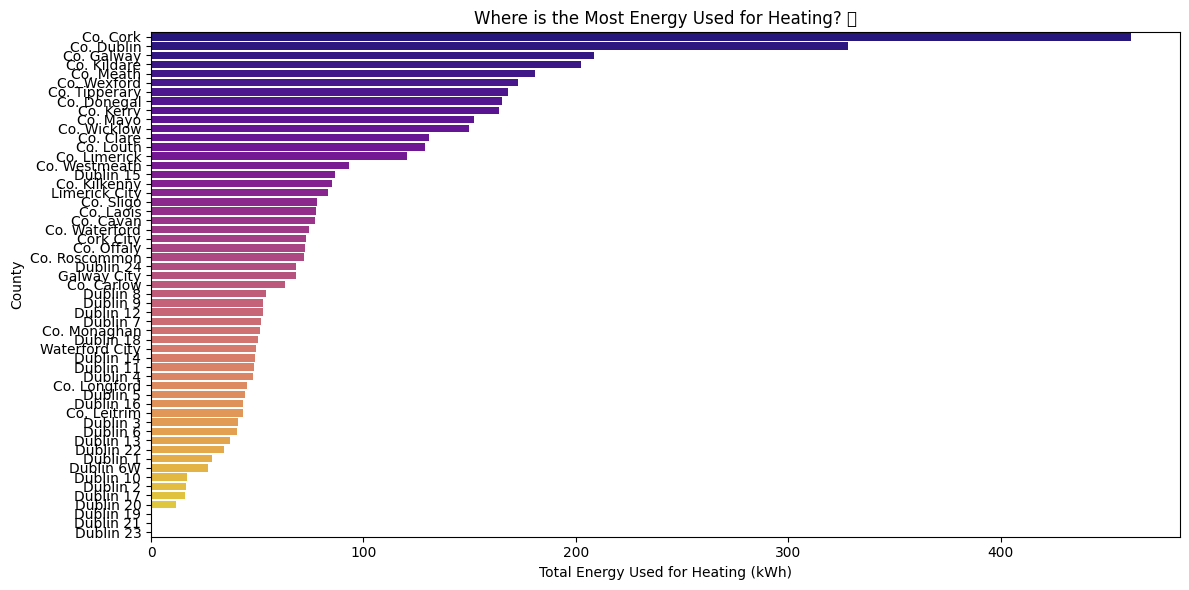

In [17]:
# --- ✅ Visualization 3: Where is the Most Energy Used for Heating? 🌡️ --- ###

# Plotting total energy used for heating (primaryenergymainspace) by county
county_heating_energy = df.groupby('countyname')['primaryenergymainspace'].sum().reset_index()
county_heating_energy = county_heating_energy.sort_values(by='primaryenergymainspace', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=county_heating_energy, x='primaryenergymainspace', y='countyname', palette='plasma')
plt.title('Where is the Most Energy Used for Heating? 🌡️')
plt.xlabel('Total Energy Used for Heating (kWh)')
plt.ylabel('County')
plt.tight_layout()
plt.savefig("most_energy_used_for_heating.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4124665709.py:16: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4124665709.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.savefig("energy_efficiency_over_time.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


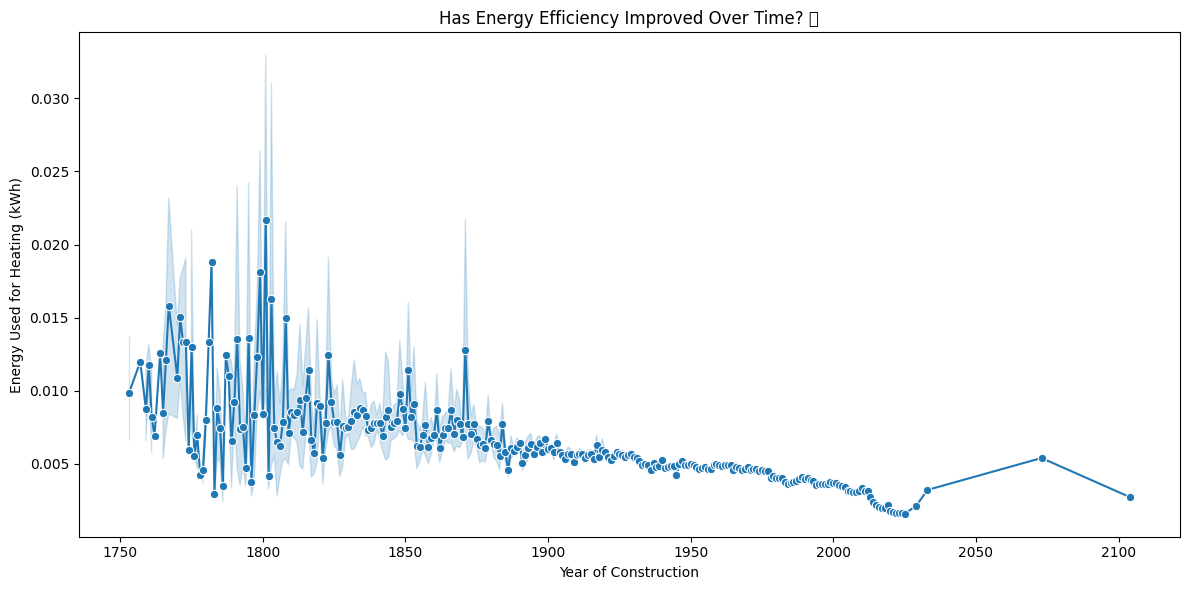

In [19]:
# --- ✅ Visualization 4: Has Energy Efficiency Improved Over Time? 📅 --- ###

# Normalizing factors
min_year = 1753
max_year = 2104

# Reverse normalize year_of_construction to actual years
df['actual_year_of_construction'] = min_year + (df['year_of_construction'] * (max_year - min_year))

# Plotting the trend of energy used for heating (primaryenergymainspace) over year of construction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='actual_year_of_construction', y='primaryenergymainspace', marker='o')
plt.title('Has Energy Efficiency Improved Over Time? 📅')
plt.xlabel('Year of Construction')
plt.ylabel('Energy Used for Heating (kWh)')
plt.tight_layout()
plt.savefig("energy_efficiency_over_time.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3814723586.py:9: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3814723586.py:10: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  plt.savefig("heating_related_emissions_over_time.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


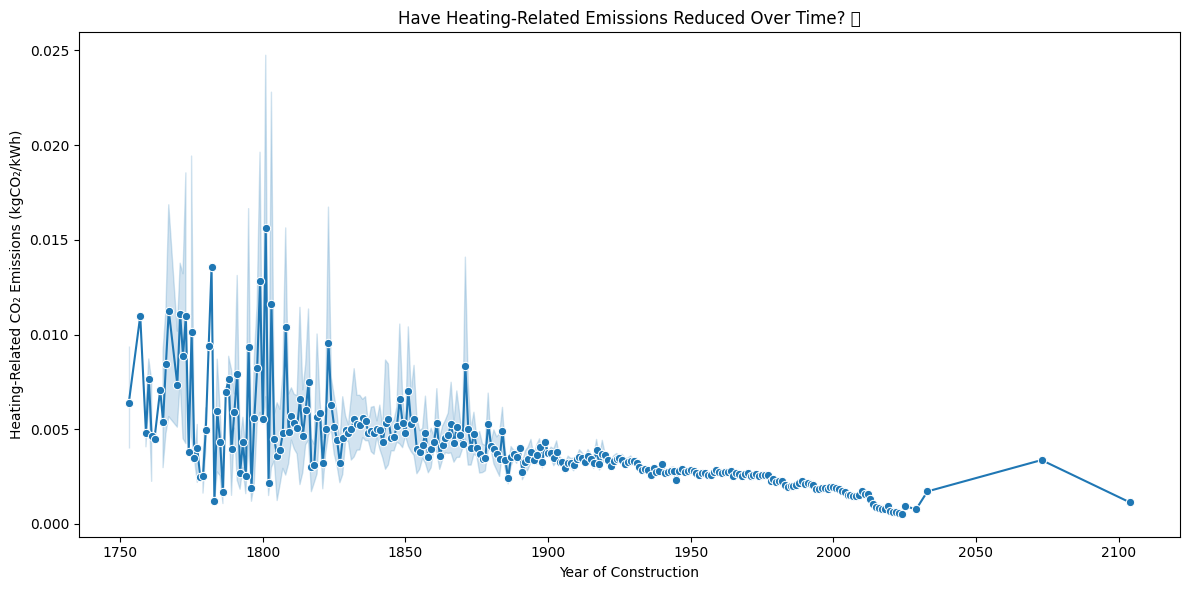

In [25]:
# --- ✅ Visualization 5: Have Heating-Related Emissions Reduced Over Time? 🏡 --- ###

# Plotting the trend of heating-related CO₂ emissions (co2mainspace) over year of construction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='actual_year_of_construction', y='co2mainspace', marker='o')
plt.title('Have Heating-Related Emissions Reduced Over Time? 🏡')
plt.xlabel('Year of Construction')
plt.ylabel('Heating-Related CO₂ Emissions (kgCO₂/kWh)')
plt.tight_layout()
plt.savefig("heating_related_emissions_over_time.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\1977928087.py:9: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\1977928087.py:10: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) DejaVu Sans.
  plt.savefig("better_insulated_walls_reduce_emissions.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


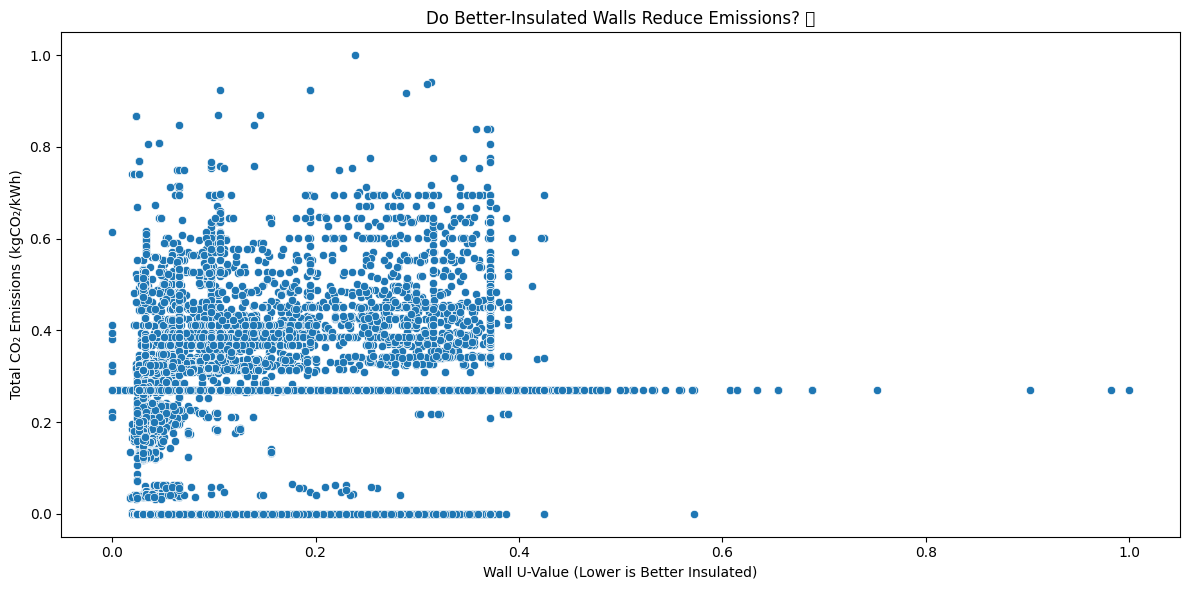

In [26]:
# --- ✅ Visualization 6: Do Better-Insulated Walls Reduce Emissions? 🏗️ --- ###

# Plotting the relationship between wall insulation (U-value) and total CO2 emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='uvaluewall', y='totalco2emissions')
plt.title('Do Better-Insulated Walls Reduce Emissions? 🏗️')
plt.xlabel('Wall U-Value (Lower is Better Insulated)')
plt.ylabel('Total CO₂ Emissions (kgCO₂/kWh)')
plt.tight_layout()
plt.savefig("better_insulated_walls_reduce_emissions.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3370755940.py:9: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3370755940.py:10: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.savefig("heat_lost_through_roof.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


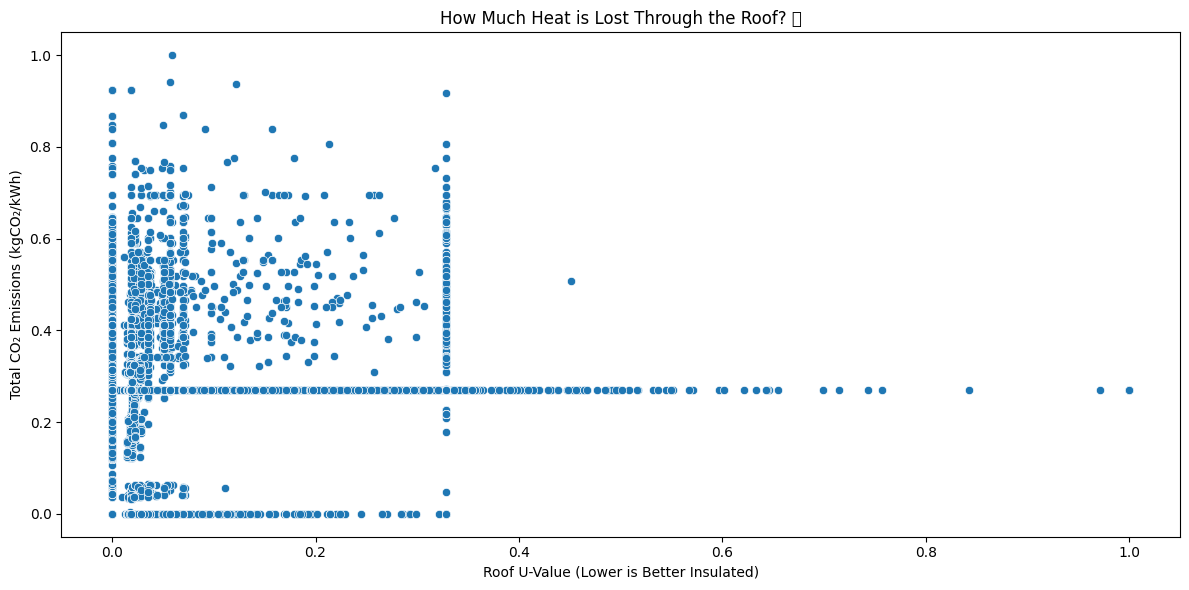

In [27]:
# --- ✅ Visualization 7: How Much Heat is Lost Through the Roof? 🏠 --- ###

# Plotting the relationship between roof insulation (U-value) and total CO2 emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='uvalueroof', y='totalco2emissions')
plt.title('How Much Heat is Lost Through the Roof? 🏠')
plt.xlabel('Roof U-Value (Lower is Better Insulated)')
plt.ylabel('Total CO₂ Emissions (kgCO₂/kWh)')
plt.tight_layout()
plt.savefig("heat_lost_through_roof.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\2579549672.py:9: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\2579549672.py:10: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.savefig("larger_walls_energy_loss.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


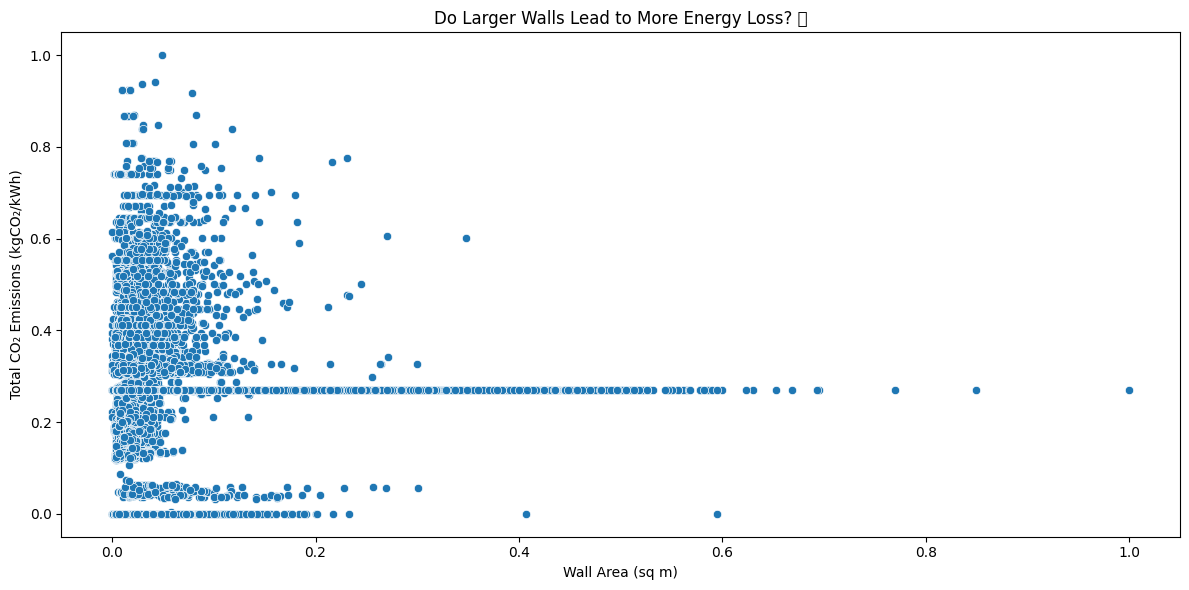

In [28]:
# --- ✅ Visualization 8: Do Larger Walls Lead to More Energy Loss? 📐 --- ###

# Plotting the relationship between wall area and total CO2 emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='wallarea', y='totalco2emissions')
plt.title('Do Larger Walls Lead to More Energy Loss? 📐')
plt.xlabel('Wall Area (sq m)')
plt.ylabel('Total CO₂ Emissions (kgCO₂/kWh)')
plt.tight_layout()
plt.savefig("larger_walls_energy_loss.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\2049364338.py:9: UserWarning: Glyph 129695 (\N{WINDOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\2049364338.py:10: UserWarning: Glyph 129695 (\N{WINDOW}) missing from font(s) DejaVu Sans.
  plt.savefig("window_size_energy_efficiency.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129695 (\N{WINDOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


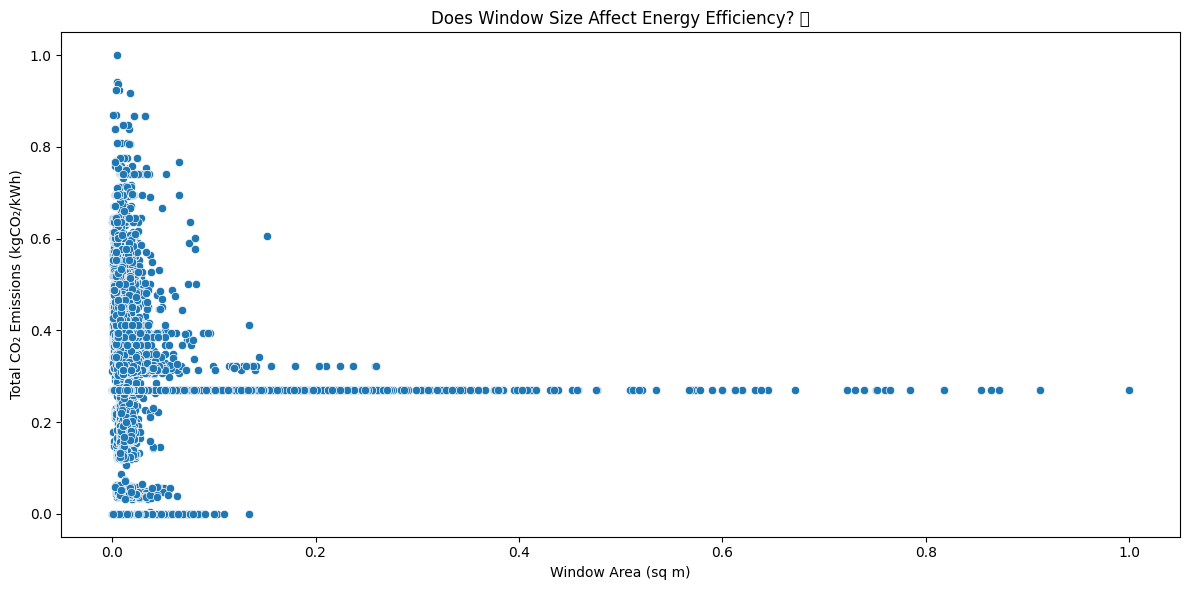

In [ ]:
# --- ✅ Visualization 9: Does Window Size Affect Energy Efficiency? 🪟 --- ###

# Plotting the relationship between window area and total CO2 emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='windowarea', y='totalco2emissions')
plt.title('Does Window Size Affect Energy Efficiency? 🪟')
plt.xlabel('Window Area (sq m)')
plt.ylabel('Total CO₂ Emissions (kgCO₂/kWh)')
plt.tight_layout()
plt.savefig("window_size_energy_efficiency.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3887635914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='insulationtype', y='berrating', palette="plasma")
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3887635914.py:10: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3887635914.py:11: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.savefig("insulation_type_berrating.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


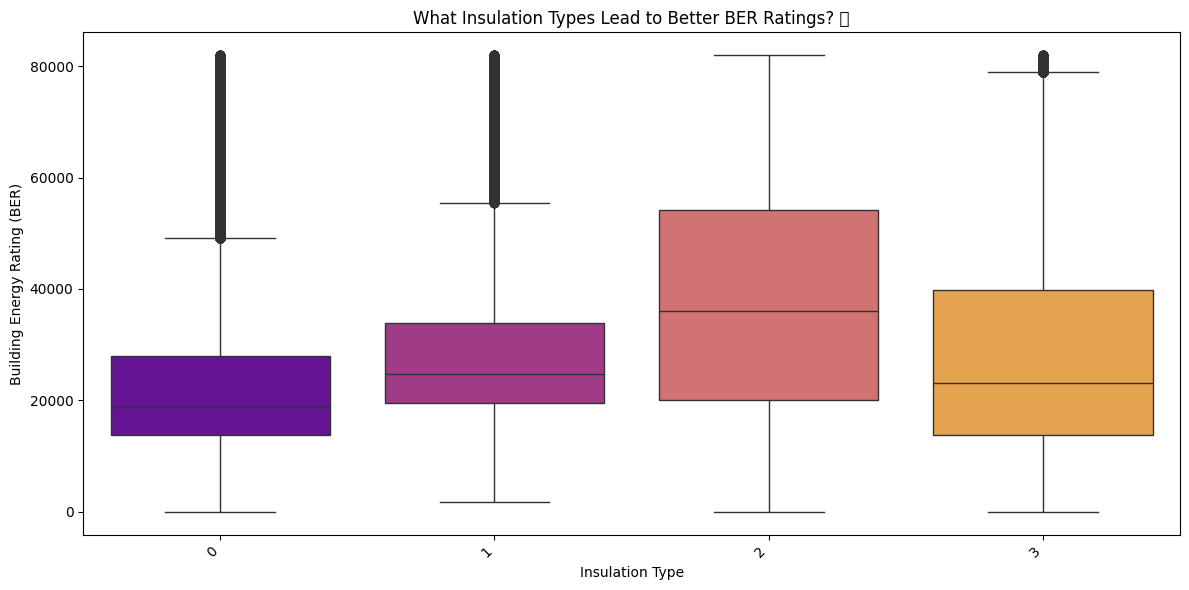

In [31]:
# --- ✅ Visualization 10: What Insulation Types Lead to Better BER Ratings? 🛠️ --- ###

# Plotting the distribution of BER ratings for different insulation types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='insulationtype', y='berrating', palette="plasma")
plt.title('What Insulation Types Lead to Better BER Ratings? 🛠️')
plt.xlabel('Insulation Type')
plt.ylabel('Building Energy Rating (BER)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("insulation_type_berrating.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\1895459388.py:9: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\1895459388.py:10: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.savefig("heat_recovery_energy_usage.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


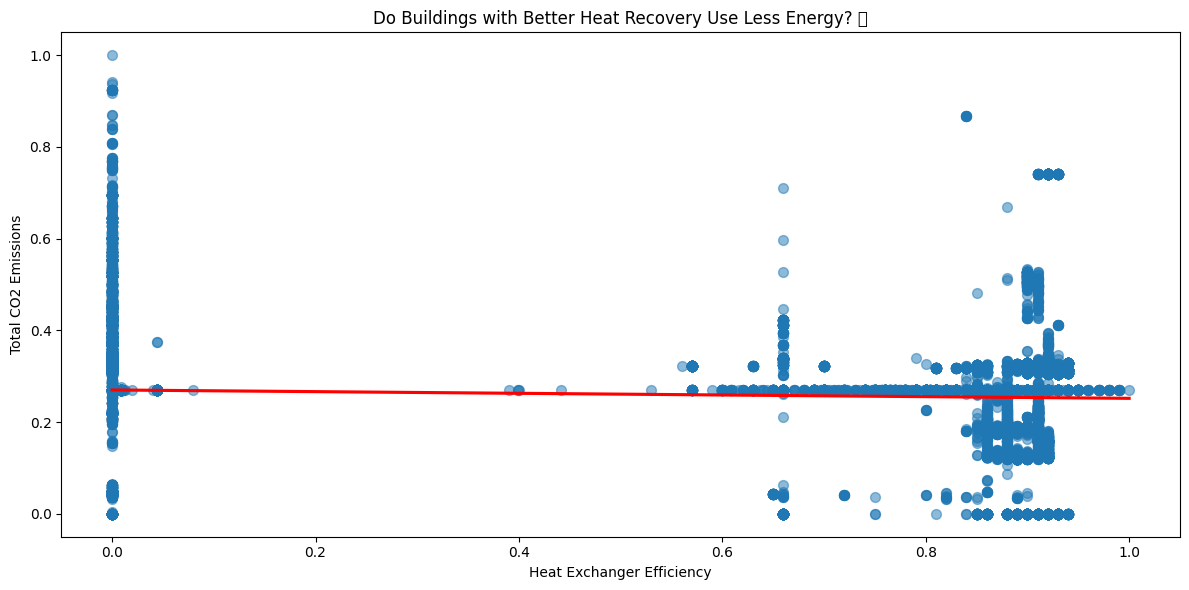

In [33]:
# --- ✅ Visualization 11: Do Buildings with Better Heat Recovery Use Less Energy? 🔄 --- ###

# Plotting the scatter plot for heat exchanger efficiency vs total CO2 emissions
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='heatexchangereff', y='totalco2emissions', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Do Buildings with Better Heat Recovery Use Less Energy? 🔄')
plt.xlabel('Heat Exchanger Efficiency')
plt.ylabel('Total CO2 Emissions')
plt.tight_layout()
plt.savefig("heat_recovery_energy_usage.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4249070837.py:9: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4249070837.py:10: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.savefig("larger_homes_co2_emissions.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


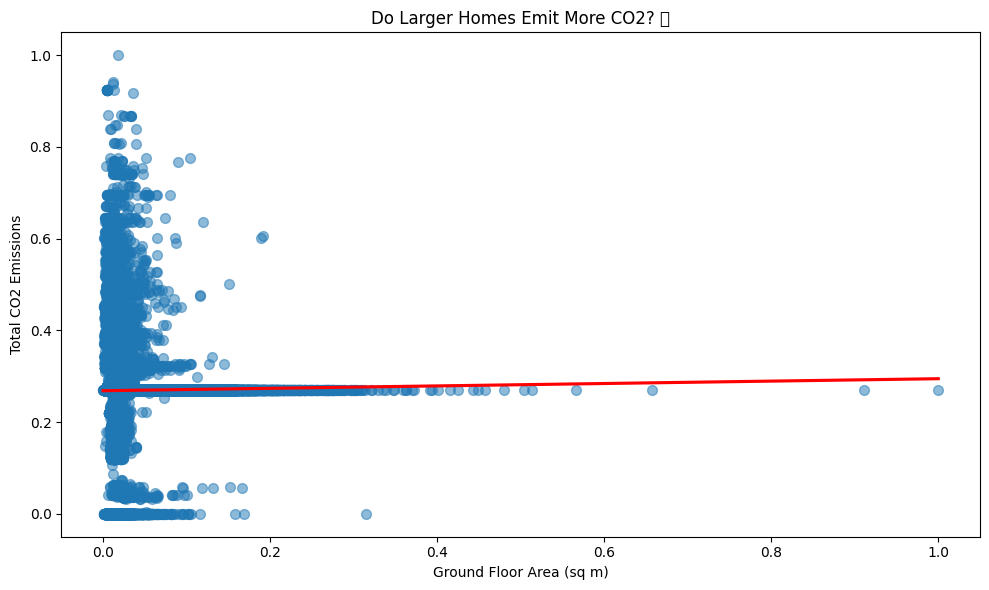

In [34]:
# --- ✅ Visualization 12: Do Larger Homes Emit More CO2? 📏 --- ###

# Plotting the scatter plot with a regression line to show the relationship between ground floor area and CO2 emissions
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='groundfloorarea(sq m)', y='totalco2emissions', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Do Larger Homes Emit More CO2? 📏')
plt.xlabel('Ground Floor Area (sq m)')
plt.ylabel('Total CO2 Emissions')
plt.tight_layout()
plt.savefig("larger_homes_co2_emissions.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\481709762.py:9: UserWarning: Glyph 127962 (\N{DERELICT HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\481709762.py:10: UserWarning: Glyph 127962 (\N{DERELICT HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.savefig("older_homes_emissions.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127962 (\N{DERELICT HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


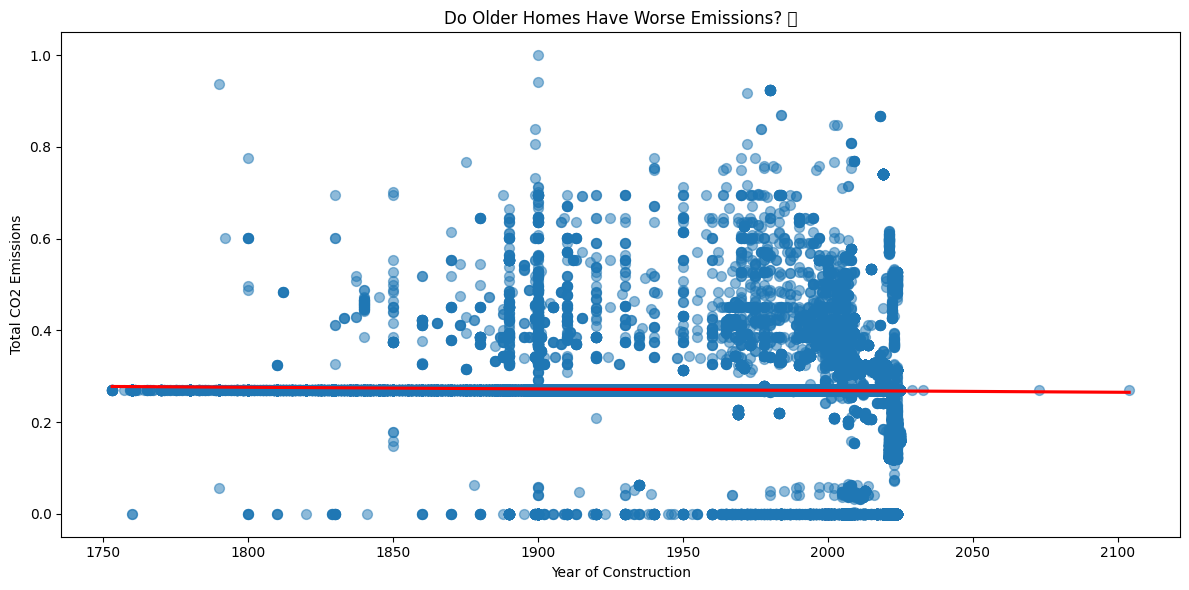

In [35]:
# --- ✅ Visualization 13: Do Older Homes Have Worse Emissions? 🏚️ --- ###

# Plotting the scatter plot with a regression line to show the relationship between year of construction and CO2 emissions
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='actual_year_of_construction', y='totalco2emissions', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Do Older Homes Have Worse Emissions? 🏚️')
plt.xlabel('Year of Construction')
plt.ylabel('Total CO2 Emissions')
plt.tight_layout()
plt.savefig("older_homes_emissions.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\1372851786.py:9: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\1372851786.py:10: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.savefig("newer_homes_better_energy_ratings.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


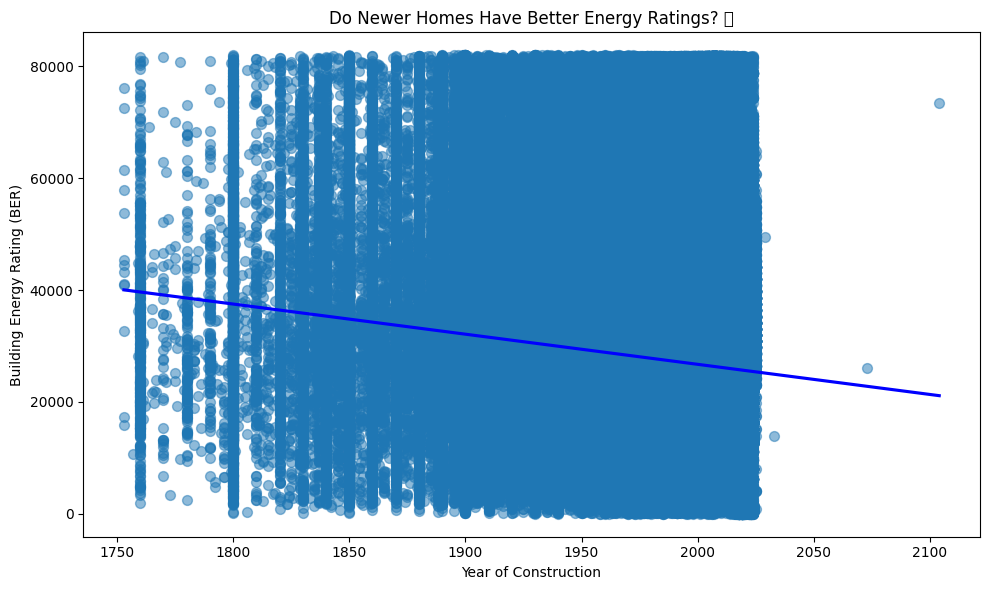

In [36]:
# --- ✅ Visualization 14: Do Newer Homes Have Better Energy Ratings? 🏠 --- ###

# Plotting the scatter plot with a regression line to show the relationship between year of construction and BER rating
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='actual_year_of_construction', y='berrating', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'blue'})
plt.title('Do Newer Homes Have Better Energy Ratings? 🏠')
plt.xlabel('Year of Construction')
plt.ylabel('Building Energy Rating (BER)')
plt.tight_layout()
plt.savefig("newer_homes_better_energy_ratings.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4199368038.py:10: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4199368038.py:10: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4199368038.py:11: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.savefig("apartments_vs_detached_houses_co2_emissions.png")
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4199368038.py:11: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  plt.savefig("apartments_vs_detached_houses_co2_emissions.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

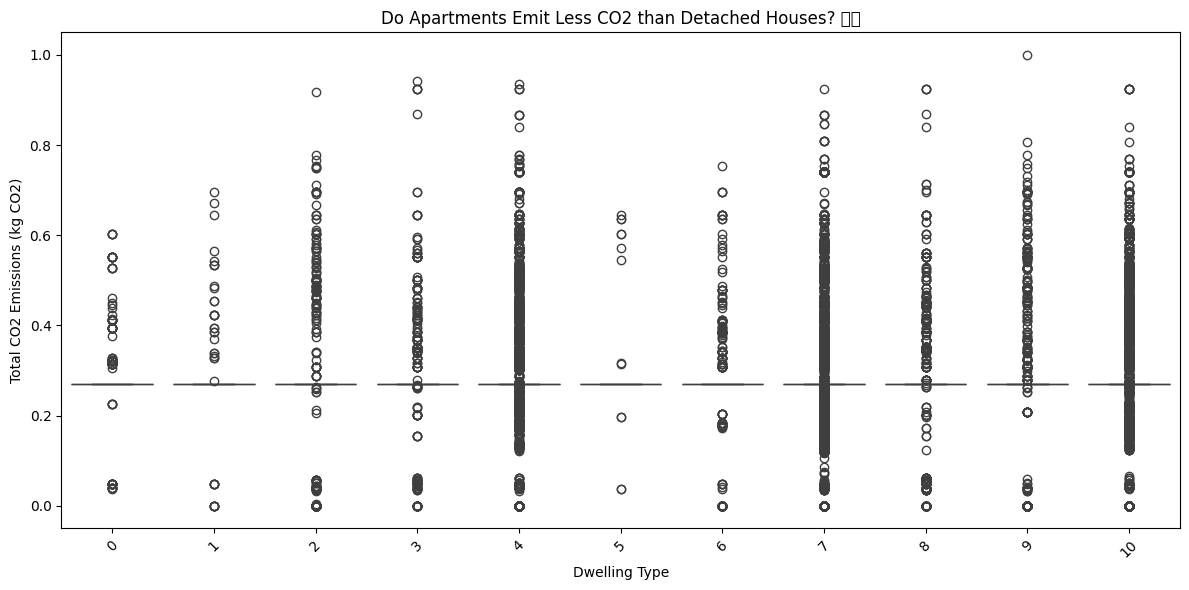

In [38]:
# --- ✅ Visualization 15: Do Apartments Emit Less CO2 than Detached Houses? 🏢🏡 --- ###

# Plotting the box plot to compare total CO2 emissions across different dwelling types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='dwellingtypedescr', y='totalco2emissions')
plt.title('Do Apartments Emit Less CO2 than Detached Houses? 🏢🏡')
plt.xlabel('Dwelling Type')
plt.ylabel('Total CO2 Emissions (kg CO2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("apartments_vs_detached_houses_co2_emissions.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3273384897.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\3273384897.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("taller_buildings_co2_emissions.png")
c:\Users\Elite\Documents\CHECKERED\Net_Zero_Ireland\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


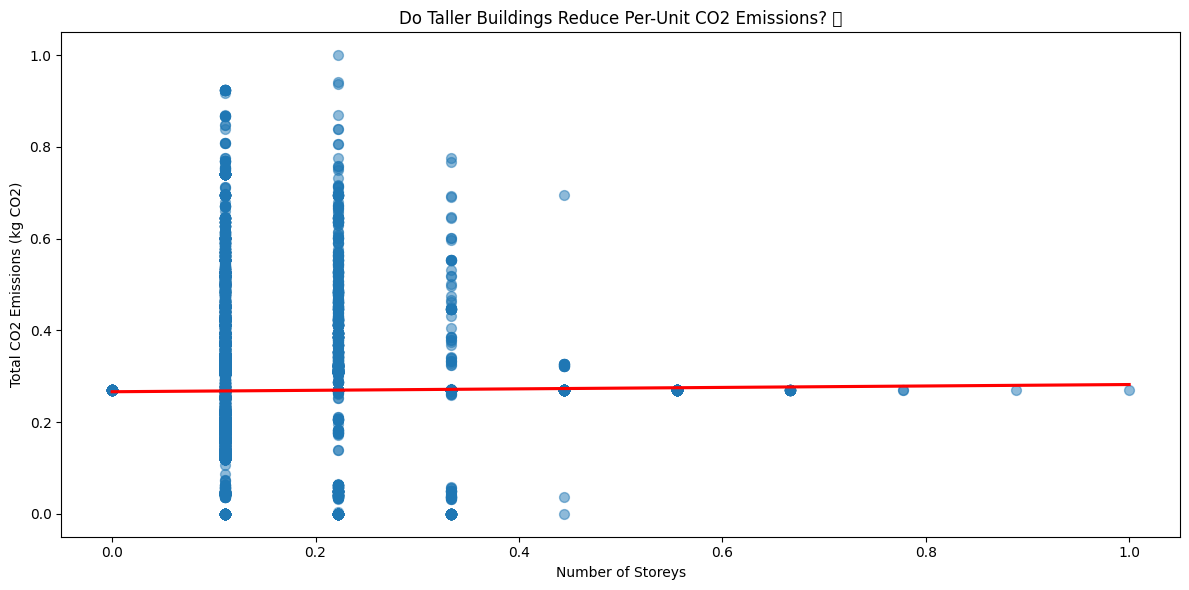

In [39]:
# --- ✅ Visualization 16: Do Taller Buildings Reduce Per-Unit CO2 Emissions? 📊 --- ###

# Plotting the scatter plot with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='nostoreys', y='totalco2emissions', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Do Taller Buildings Reduce Per-Unit CO2 Emissions? 📊')
plt.xlabel('Number of Storeys')
plt.ylabel('Total CO2 Emissions (kg CO2)')
plt.tight_layout()
plt.savefig("taller_buildings_co2_emissions.png")
plt.show()

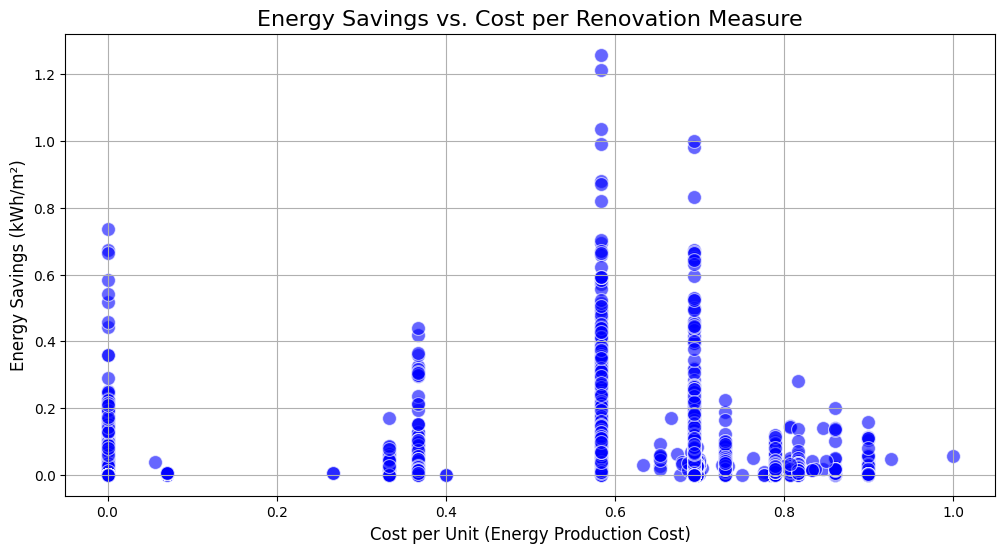

In [40]:
# --- ✅ Visualization 17: Energy savings cost 📊 --- ###

# Plotting the scatter plot with a regression line

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_selected, x='cost_per_unit', y='energy_savings', color='blue', s=100, alpha=0.6)
plt.title("Energy Savings vs. Cost per Renovation Measure", fontsize=16)
plt.xlabel("Cost per Unit (Energy Production Cost)", fontsize=12)
plt.ylabel("Energy Savings (kWh/m²)", fontsize=12)
plt.grid(True)
plt.savefig("energy_savings_cost.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_25180\4000016248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_selected, x='investment', y='cost_savings_per_dollar', palette='plasma')


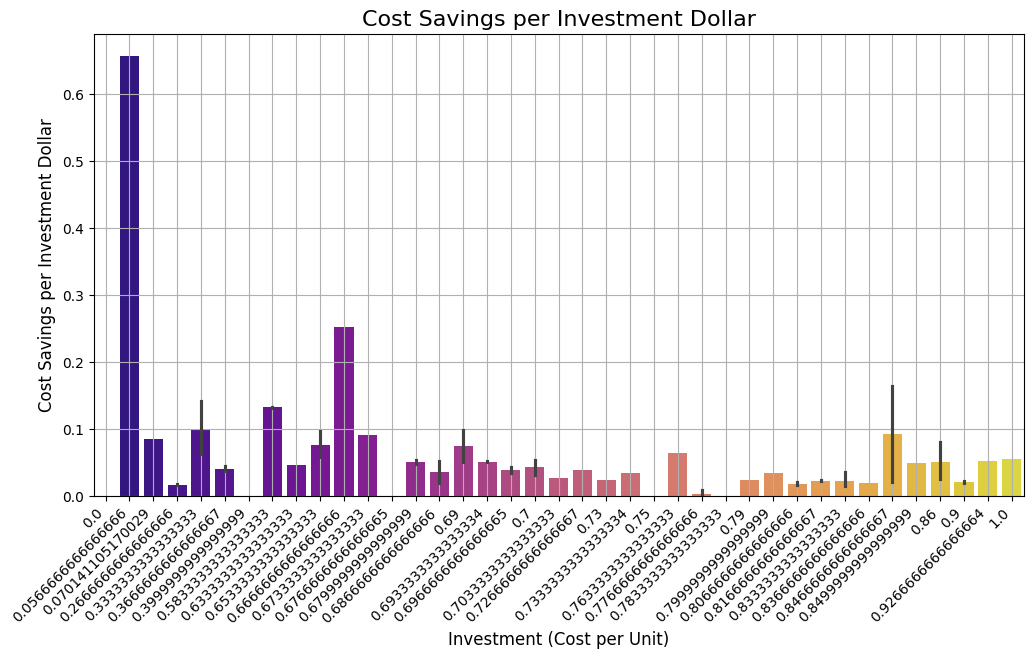

In [43]:
# --- ✅ Visualization 18: Cost savings investment 📊 --- ###

# Plotting the bar plot

plt.figure(figsize=(12, 6))
sns.barplot(data=df_selected, x='investment', y='cost_savings_per_dollar', palette='plasma')
plt.title("Cost Savings per Investment Dollar", fontsize=16)
plt.xlabel("Investment (Cost per Unit)", fontsize=12)
plt.ylabel("Cost Savings per Investment Dollar", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.savefig("cost_savings_investment.png")
plt.show()